In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.initializers import GlorotUniform, HeUniform, HeNormal
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
%pip install tab2img -q # q for quiet
from tab2img.converter import Tab2Img
seed = 314159
np.random.seed(seed)
tf.random.set_seed(seed)

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

from keras.datasets import cifar10, mnist
from keras.optimizers.legacy import SGD, Adam
from keras.utils import to_categorical
from keras.backend import image_data_format
from keras.applications.mobilenet import MobileNet
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Reshape
from keras.layers import Dense, Dropout, BatchNormalization


import matplotlib.pyplot as plt
import numpy as np
import copy

import csv
import random
import time

# Importing necessary libraries for preprocessing and modeling
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout


In [13]:
def sample_data(df, sample_fraction=0.01):
    sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)
    return sampled_df


In [17]:
# df_data_1 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Benign-Monday-no-metadata.parquet'))
df_data_2 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Botnet-Friday-no-metadata.parquet')
df_data_3 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Bruteforce-Tuesday-no-metadata.parquet')
df_data_4 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DDoS-Friday-no-metadata.parquet')
df_data_5 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DoS-Wednesday-no-metadata.parquet')
df_data_6 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Infiltration-Thursday-no-metadata.parquet')
df_data_7 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Portscan-Friday-no-metadata.parquet')
df_data_8 = pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/WebAttacks-Thursday-no-metadata.parquet')

df_data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4,
                     df_data_5, df_data_6, df_data_7, df_data_8], axis=0, ignore_index=True)


In [5]:
# df_data_1 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Benign-Monday-no-metadata.parquet'))
# df_data_2 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Botnet-Friday-no-metadata.parquet'))
# df_data_3 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Bruteforce-Tuesday-no-metadata.parquet'))
# df_data_4 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DDoS-Friday-no-metadata.parquet'))
# df_data_5 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/DoS-Wednesday-no-metadata.parquet'))
# df_data_6 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Infiltration-Thursday-no-metadata.parquet'))
# df_data_7 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/Portscan-Friday-no-metadata.parquet'))
# df_data_8 = sample_data(pd.read_parquet('C:/Users/Mo-gh/Desktop/New folder/WebAttacks-Thursday-no-metadata.parquet'))

# df_data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4,
#                      df_data_5, df_data_6, df_data_7, df_data_8], axis=0, ignore_index=True)


C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_17240\379523226.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)
C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_17240\379523226.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Label').apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)
C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_17240\379523226.py:2: FutureWarning: 

In [18]:
null_counts = df_data.isnull().sum()
df_data.dropna(inplace=True)
duplicate_count = df_data.duplicated().sum()
df_data.drop_duplicates(inplace=True)
df_data.reset_index(drop=True, inplace=True)
X = df_data.copy()
X = df_data.drop('Label', axis=1)
y = df_data['Label']
y = y.astype(str)
y = y.replace({
    'Benign': 0,
    'DoS Hulk': 2,
    'PortScan': 4,
    'DDoS': 2,
    'DoS GoldenEye': 2,
    'DoS slowloris': 2,
    'DoS Slowhttptest': 2,
    'Bot': 1,
    'Infiltration': 3,
    'Heartbleed': 2,
    'FTP-Patator': 5,
    'SSH-Patator': 5,
    'Web Attack � Brute Force': 6,  # Adjusted class name
    'Web Attack � XSS': 6,          # Adjusted class name
    'Web Attack � Sql Injection': 6  # Adjusted class name
})

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
y = pd.Series(y)
class_counts = y.value_counts()
class_ratios = class_counts / len(y)

# y = to_categorical(y)

C:\Users\Mo-gh\AppData\Local\Temp\ipykernel_17240\3261329185.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({


In [6]:
# from imblearn.over_sampling import SMOTE

# # Assuming you want to use SMOTE for the final resampling
# X_res, y_res = SMOTE().fit_resample(X_resampled, y_resampled)
# print(y_res.value_counts())

In [19]:
print(y.value_counts())

Label
0    1444199
2     321770
5       9150
6       2143
4       1956
1       1437
3         36
Name: count, dtype: int64


In [21]:
# Set seed
seed_pi = 314159

# Set numpy seed
np.random.seed(seed_pi)
# Set the seed for TensorFlow
tf.random.set_seed(seed_pi)

In [22]:
# Extract features as X
X = df_data.copy()
X = df_data.drop('Label', axis=1)

# Extract target as y
# y = df_data['Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = pd.Series(y_encoded)

# Inspect encoding
print('Inspection of Target Feature - y under Multiclass Configuration:\n')
y.value_counts()

Inspection of Target Feature - y under Multiclass Configuration:



0    1444199
2     321770
5       9150
6       2143
4       1956
1       1437
3         36
Name: count, dtype: int64

In [23]:
def extractAllSets(X,y,p_train,p_val,p_test,random_state=seed_pi,shuffle=True):
    ''''
    Splits a given pandas dataframe X (features) into three subsets:X_train, X_val and X_test.
    Also splits a given pandas series y (target) to y_train, y_val and y_test respectively.
    Fractional ratios are provided by the user, as percentages, namely: p_train, p_valid, p_test.
    These inputs describe the percentage of the extracted sets in reference with the inputs X and y.
    The final sets are extracted by executing method train_test_split() twice.
    '''
    # The initial train-test split produces X_train and y_train
    # Two additional sets are created X_temp and y_temp, that will produce the rest of the sets
    X_train, X_temp, y_train, y_temp = train_test_split(X,y, stratify=y,
        test_size=(1.0 - p_train), random_state=random_state, shuffle=shuffle)
                                                                        # Enable/desable shuffling
    # Note that by applying the stratify condition we ensure homogeneous distribution
    # of chareacteristics in targets

    # Parameter fraction describes the relevant size of the test size
    fraction = p_test / (p_val + p_test)
    X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,stratify=y_temp,
        test_size=fraction, random_state=random_state, shuffle=shuffle) # Enable/desable shuffling
    # Note that we use the same random_state twice for reproducibility

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = extractAllSets(X, y, 0.65, 0.1, 0.25)

# Organize all sets in list format
original_data = [X_train, X_val, X_test, y_train, y_val, y_test]

In [24]:
# Initialize QuantileTransformer with uniform distribution
quantile_transformer = QuantileTransformer(n_quantiles=10**4, output_distribution='uniform')

# Fit and transform the training data
X_train_transformed = quantile_transformer.fit_transform(X_train)

# Transform the validation and test data using the same transformer
X_val_transformed  = quantile_transformer.transform(X_val)
X_test_transformed = quantile_transformer.transform(X_test)

# Arrange transformed data as a list
scaled_data = [X_train_transformed, X_val_transformed, X_test_transformed, y_train, y_val, y_test]

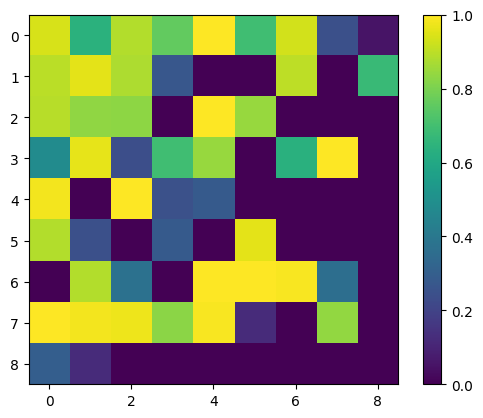

In [25]:
# Define the Tab2Img model
model_tab2img = Tab2Img()

""" In this stage, every sample in the data becomes a (9x9) numpy array. """
# Convert training data
X_train_images = model_tab2img.fit_transform(X_train_transformed, y_train.values)

# Convert validation and test data (using the fitted model)
X_val_images  = model_tab2img.transform(X_val_transformed)
X_test_images = model_tab2img.transform(X_test_transformed)

""" In this stage, every array in the data becomes a (9x9x1) greyscale image. """
# Greyscale Transformation - Reshape the image data for CNN input
X_train_images = X_train_images.reshape(-1, 9, 9, 1)
X_val_images   = X_val_images.reshape(  -1, 9, 9, 1)
X_test_images  = X_test_images.reshape( -1, 9, 9, 1)

# Visualize an example
plt.imshow(X_train_images[0])
plt.colorbar()
plt.show()

In [26]:
import numpy as np
X_train_images = np.array(X_train_images)
X_val_images = np.array(X_val_images)
X_test_images = np.array(X_test_images)
Y_train = np.array(y_train)
Y_val = np.array(y_val)
Y_test_test = np.array(y_test)

In [27]:
X_train_images.shape, Y_train.shape, X_val_images.shape, Y_val.shape, X_test_images.shape, Y_test_test.shape

((1157449, 9, 9, 1),
 (1157449,),
 (178069, 9, 9, 1),
 (178069,),
 (445173, 9, 9, 1),
 (445173,))

In [15]:
# from keras.utils import to_categorical
# Y_train = to_categorical(Y_train)
# # Y_val = to_categorical(Y_val)
# Y_test_test = to_categorical(Y_test_test)

In [28]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_images and Y_train are already defined and loaded
# X_train_images: Training images data
# Y_train: Training labels

# Parameters for Dirichlet distribution
num_clients = 10
num_samples = len(X_train_images)
num_classes = 7  # Number of classes in the dataset
alpha = np.full(num_classes, 0.1) # Dirichlet concentration parameter

# Original class distribution
class_counts = np.array([1444199, 321770, 9150, 2143, 1956, 1437, 36])

# Shuffle the data before partitioning
indices = np.arange(num_samples)
np.random.shuffle(indices)
X_train_images = X_train_images[indices]
Y_train = Y_train[indices]

# Partition the data into  subsets for clients
client_data = [[] for _ in range(num_clients)]
client_labels = [[] for _ in range(num_clients)]
for i in range(num_samples):
    client_index = i % num_clients
    client_data[client_index].append(X_train_images[i])
    client_labels[client_index].append(Y_train[i])

# Generate non-iid data for each client
non_iid_data = []
non_iid_labels = []
for client_index in range(num_clients):
    client_data_np = np.array(client_data[client_index])
    client_labels_np = np.array(client_labels[client_index])

    # Generate probabilities for each class using Dirichlet distribution
    dirichlet_dist = tfp.distributions.Dirichlet(alpha)
    class_probs = dirichlet_dist.sample(1).numpy().reshape(-1)  # Sample one set of class probabilities

    # Scale class probabilities based on original class distribution
    scaled_probs = class_probs * class_counts / np.sum(class_probs * class_counts)

    # Calculate the number of samples for each class based on scaled probabilities
    class_counts_client = (scaled_probs * len(client_labels_np)).astype(int)

    # Adjust counts to match the desired total number of samples
    total_count = np.sum(class_counts_client)
    if total_count != len(client_labels_np):
        diff = len(client_labels_np) - total_count
        class_counts_client[np.argmax(class_counts_client)] += diff  # Add the difference to the class with the highest count

    # Cap the number of samples based on available data
    class_counts_client = np.minimum(class_counts_client, np.bincount(client_labels_np, minlength=num_classes))

    # Generate non-iid labels
    client_labels_non_iid = []
    for class_label, count in enumerate(class_counts_client):
        client_labels_non_iid.extend([class_label] * count)

    # Shuffle the labels to ensure randomness
    np.random.shuffle(client_labels_non_iid)

    non_iid_labels.append(np.array(client_labels_non_iid))

    # Generate non-iid data samples
    client_data_non_iid = []
    for label in client_labels_non_iid:
        label_indices = np.where(client_labels_np == label)[0]
        if len(label_indices) == 0:
            continue  # Skip this label if it doesn't exist in the client's dataset
        selected_index = np.random.choice(label_indices)
        client_data_non_iid.append(client_data_np[selected_index])

    non_iid_data.append(np.array(client_data_non_iid))

# Generate test set based on each client's non-iid data
non_iid_data_test = []
non_iid_labels_test = []
for client_index in range(num_clients):
    # Check if the client has non-empty data
    if len(non_iid_data[client_index]) == 0:
        continue

    # Use a portion of each client's non-iid data as the test set
    test_set_size = int(0.4 * len(non_iid_data[client_index]))
    test_indices = np.random.choice(len(non_iid_data[client_index]), test_set_size, replace=False)
    test_data = non_iid_data[client_index][test_indices]
    test_labels = non_iid_labels[client_index][test_indices]

    non_iid_data_test.append(test_data)
    non_iid_labels_test.append(test_labels)

non_iid_data_test = np.concatenate(non_iid_data_test, axis=0)
non_iid_labels_test = np.concatenate(non_iid_labels_test, axis=0)

# Convert lists to numpy arrays for further processing
non_iid_data = [np.array(data) for data in non_iid_data]
non_iid_labels = [np.array(labels) for labels in non_iid_labels]

# Print shapes of the generated data for verification
for i in range(num_clients):
    print(f"Client {i}: Data shape: {non_iid_data[i].shape}, Labels shape: {non_iid_labels[i].shape}")

print(f"Test data shape: {non_iid_data_test.shape}, Test labels shape: {non_iid_labels_test.shape}")




Client 0: Data shape: (23655, 9, 9, 1), Labels shape: (23655,)
Client 1: Data shape: (49926, 9, 9, 1), Labels shape: (49926,)
Client 2: Data shape: (21543, 9, 9, 1), Labels shape: (21543,)
Client 3: Data shape: (489, 9, 9, 1), Labels shape: (489,)
Client 4: Data shape: (189, 9, 9, 1), Labels shape: (189,)
Client 5: Data shape: (93863, 9, 9, 1), Labels shape: (93863,)
Client 6: Data shape: (94233, 9, 9, 1), Labels shape: (94233,)
Client 7: Data shape: (25870, 9, 9, 1), Labels shape: (25870,)
Client 8: Data shape: (94668, 9, 9, 1), Labels shape: (94668,)
Client 9: Data shape: (913, 9, 9, 1), Labels shape: (913,)
Test data shape: (162137, 9, 9, 1), Test labels shape: (162137,)


In [29]:
for i in range(num_clients):
    lst = [0 for _ in range(num_classes)]
    for j in range(len(non_iid_labels[i])):
        value = non_iid_labels[i][j]
        lst[value] += 1
    print(f"Client {i}: {lst}")


Client 0: [2449, 0, 21073, 3, 0, 0, 130]
Client 1: [49808, 101, 0, 3, 0, 14, 0]
Client 2: [475, 3, 20785, 2, 133, 0, 145]
Client 3: [29, 78, 72, 3, 30, 277, 0]
Client 4: [0, 88, 0, 0, 101, 0, 0]
Client 5: [93861, 0, 0, 0, 0, 0, 2]
Client 6: [93966, 107, 31, 2, 127, 0, 0]
Client 7: [23030, 90, 2747, 0, 0, 3, 0]
Client 8: [94011, 0, 654, 3, 0, 0, 0]
Client 9: [479, 113, 278, 0, 7, 36, 0]


In [30]:
from keras.layers import Dense, GRU, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from tensorflow.keras.regularizers import l2

input_shape = (9,9,1)
class CustomModel:
    def __init__(self, loss, optimizer, num_classes):
        self.loss = loss
        self.optimizer = optimizer
        self.num_classes = num_classes

    def fl_paper_model(self,train_shape):

          conv_initializer   = HeNormal(seed=seed_pi)
          dense_initializer  = HeUniform(seed=seed_pi)
          output_initializer = GlorotUniform(seed=seed_pi)

          mlp = Sequential([
          Input(shape=(9, 9, 1)),
          Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=conv_initializer),
          MaxPooling2D(pool_size=(2, 2)),
          Flatten(),
          Dense(128, activation = 'relu', kernel_initializer = dense_initializer,kernel_regularizer=l2(0.02)),
          BatchNormalization(),
          Dropout(0.02),

          Dense(7, activation = 'sigmoid', kernel_initializer = output_initializer)
          ])

          mlp.compile(loss=self.loss, optimizer=self.optimizer, metrics=['accuracy'])
          return mlp

In [22]:
from tensorflow.keras.optimizers import Adam, SGD

# Global configuration
NUMOFCLIENTS = 10  # number of clients (particles)
EPOCHS = 30  # number of total iterations
CLIENT_EPOCHS = 5  # number of each client's iterations
BATCH_SIZE = 256 # Size of batches to train on
ACC = 0.5
LOCAL_ACC = 0.9
GLOBAL_ACC = 1.4
DROP_RATE = 0
# Model configuration
LOSS = 'sparse_categorical_crossentropy'
NUMOFCLASSES = 7

lr = 0.0002
OPTIMIZER = Adam(learning_rate=lr)
# OPTIMIZER = SGD(learning_rate=lr, momentum=0.9, nesterov=False)

# Function to write results to CSV
def write_csv(algorithm_name, list):
    file_name = '{name}_10Clients_{drop}%_output_LR_{lr}_CLI_{cli}_CLI_EPOCHS_{cli_epoch}_TOTAL_EPOCHS_{epochs}_BATCH_{batch}.csv'
    file_name = file_name.format(drop=DROP_RATE, name=algorithm_name, lr=lr, cli=NUMOFCLIENTS, cli_epoch=CLIENT_EPOCHS, epochs=EPOCHS, batch=BATCH_SIZE)
    f = open(file_name, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)

    for l in list:
        wr.writerow(l)
    f.close()

def init_model(train_data_shape):
    model = CustomModel(loss=LOSS, optimizer=OPTIMIZER,num_classes=NUMOFCLASSES)
    init_model = model.fl_paper_model(train_shape=train_data_shape)

    return init_model

def client_data_config(non_iid_data, non_iid_labels, num_clients):
    client_data = []
    for i in range(num_clients):
        x_data, y_data = non_iid_data[i], non_iid_labels[i]
        client_data.append((x_data, y_data))

    return client_data

class particle():
    def __init__(self, particle_num, client, x_train, y_train):
        # for check particle id
        self.particle_id = particle_num

        # particle model init
        self.particle_model = client

        # best model init
        self.local_best_model = client
        self.global_best_model = client

        # best score init
        self.local_best_score = 0.0
        self.global_best_score = 0.0

        self.x = x_train
        self.y = y_train

        # acc = acceleration
        self.parm = {'acc':ACC, 'local_acc':LOCAL_ACC, 'global_acc':GLOBAL_ACC}

        # velocities init
        self.velocities = [None] * len(client.get_weights())
        for i, layer in enumerate(client.get_weights()):
            self.velocities[i] = np.random.rand(*layer.shape) / 5 - 0.10

    def train_particle(self):
        print("particle {}/{} fitting".format(self.particle_id+1, NUMOFCLIENTS))

        # set each epoch's weight
        step_model = self.particle_model
        step_weight = step_model.get_weights()

        # new_velocities = [None] * len(step_weight)
        new_weight = [None] * len(step_weight)
        local_rand, global_rand = random.random(), random.random()

        # PSO algorithm applied to weights
        for index, layer in enumerate(step_weight):
            new_v = self.parm['acc'] * self.velocities[index]
            new_v = new_v + self.parm['local_acc'] * local_rand * (self.local_best_model.get_weights()[index] - layer)
            new_v = new_v + self.parm['global_acc'] * global_rand * (self.global_best_model.get_weights()[index] - layer)
            self.velocities[index] = new_v
            new_weight[index] = step_weight[index] + self.velocities[index]

        optimizer = Adam(learning_rate=lr)
        step_model.compile(optimizer=optimizer, loss=LOSS, metrics=['accuracy'])

        step_model.set_weights(new_weight)

        # Recreate the optimizer to avoid the error

        # 4.2 - Early Stopping, Learning Rate Scheduler and Compiling
        # save_model_path = 'checkpoint/checkpoint_particle_{}.weights.h5'.format(self.particle_id)
        save_model_path = 'checkpoint_1/checkpoint_particle_{}.weights.h5'.format(self.particle_id)

        mc = ModelCheckpoint(filepath=save_model_path,
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            save_weights_only=True)

        early_stopping = EarlyStopping(
            monitor='accuracy',
            patience=10,
            verbose=1,
            restore_best_weights=True)

        reduce_lr = ReduceLROnPlateau(
            monitor='accuracy',
            patience=5,
            min_lr=1e-07,
            verbose=1,
            factor=0.1)

        hist = step_model.fit(x=self.x, y=self.y,
                              epochs=CLIENT_EPOCHS,
                              batch_size=BATCH_SIZE,
                              verbose=1,
                              validation_split=0.1,
                              callbacks=[mc,reduce_lr,early_stopping])

        train_score_loss = hist.history['val_loss'][-1]

        step_model.load_weights(save_model_path)
        self.particle_model = step_model

        if self.global_best_score >= train_score_loss:
            self.local_best_model = step_model

        return self.particle_id, train_score_loss

    def update_global_model(self, global_best_model, global_best_score):
        if self.local_best_score < global_best_score:
            self.global_best_model = global_best_model
            self.global_best_score = global_best_score

    def resp_best_model(self, gid):
        if self.particle_id == gid:
            return self.particle_model


def get_best_score_by_loss(step_result):
    # step_result = [[step_model, train_socre_acc],...]
    temp_score = 100000
    temp_index = 0

    for index, result in enumerate(step_result):
        if temp_score > result[1]:
            temp_score = result[1]
            temp_index = index

    return step_result[temp_index][0], step_result[temp_index][1]


def get_best_score_by_acc(step_result):
    # step_result = [[step_model, train_socre_acc],...]
    temp_score = 0
    temp_index = 0

    for index, result in enumerate(step_result):
        if temp_score < result[1]:
            temp_score = result[1]
            temp_index = index

    return step_result[temp_index][0], step_result[temp_index][1]

if __name__ == "__main__":

    x_train = non_iid_data
    y_train = non_iid_labels
    x_test = non_iid_data_test
    y_test = non_iid_labels_test


    for i in range(NUMOFCLIENTS):
        lst = [0 for _ in range(NUMOFCLASSES)]
        for j in range(len(non_iid_labels[i])):
            value = non_iid_labels[i][j]
            lst[value] += 1
        print(f"Client {i}: {lst}")


    train_data_shape = (x_train[0].shape[1],)
    print("Shape of a single data point:", train_data_shape)
    client_data = client_data_config(x_train, y_train, NUMOFCLIENTS)

    server_model = init_model(train_data_shape=train_data_shape)
    # print(server_model.summary())

    pso_model = []
    for i in range(NUMOFCLIENTS):
        pso_model.append(particle(particle_num=i, client=init_model(train_data_shape = x_train[0].shape[1]), x_train=client_data[i][0], y_train=client_data[i][1]))

    server_evaluate_acc = []
    global_best_model = None
    global_best_score = 0.0

    for epoch in range(EPOCHS):
        server_result = []
        start = time.time()

        for client in pso_model:
            if epoch != 0:
                client.update_global_model(server_model, global_best_score)

            pid, train_score = client.train_particle()
            rand = random.randint(0, 99)

            drop_communication = range(DROP_RATE)
            if rand not in drop_communication:
                server_result.append([pid, train_score])

        gid, global_best_score = get_best_score_by_loss(server_result)
        for client in pso_model:
            if client.resp_best_model(gid) != None:
                global_best_model = client.resp_best_model(gid)

        server_model = global_best_model

        print("server {}/{} evaluate".format(epoch + 1, EPOCHS))
        server_evaluate_acc.append(server_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1))

    write_csv("FedPSO_Dritchlit_CICIDS", server_evaluate_acc)

    '''Confusion Matrix FedPSO_Dritchlit_CICIDS:
[[147333      0      0      0     20      0      0]
 [   112      0      0      0      0      0      0]
 [  7191      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0]
 [    19      0      0      0    149      0      0]
 [    53      0      0      0      0      0      0]
 [    53      0      0      0      0      0      0]]'''


Client 0: [741, 35, 2, 2, 76, 2, 63]
Client 1: [62648, 0, 0, 0, 65, 0, 0]
Client 2: [59937, 36, 10489, 0, 72, 46, 0]
Client 3: [62598, 7, 5260, 0, 0, 13, 6]
Client 4: [53794, 53, 325, 1, 0, 9, 0]
Client 5: [1, 45, 51, 0, 67, 18, 0]
Client 6: [62463, 53, 6, 0, 0, 0, 0]
Client 7: [3149, 0, 188, 0, 49, 0, 78]
Client 8: [62660, 23, 8, 2, 61, 52, 0]
Client 9: [361, 54, 1670, 0, 7, 0, 0]
Shape of a single data point: (9,)
particle 1/10 fitting
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.0922 - loss: 8.3789 - val_accuracy: 0.7419 - val_loss: 7.0918 - learning_rate: 2.0000e-04
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1475 - loss: 8.0158 - val_accuracy: 0.8172 - val_loss: 6.9476 - learning_rate: 2.0000e-04
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2394 - loss: 7.7706 - val_accuracy: 0.8172 - val_loss: 6.8379 - learning_rate: 2.0000e-04
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2879 - loss: 7.5493 - val_accuracy: 0.8

4842/4842 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step
Confusion Matrix:
[[147333      0      0      0     20      0      0]
 [   112      0      0      0      0      0      0]
 [  7191      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0]
 [    19      0      0      0    149      0      0]
 [    53      0      0      0      0      0      0]
 [    53      0      0      0      0      0      0]]


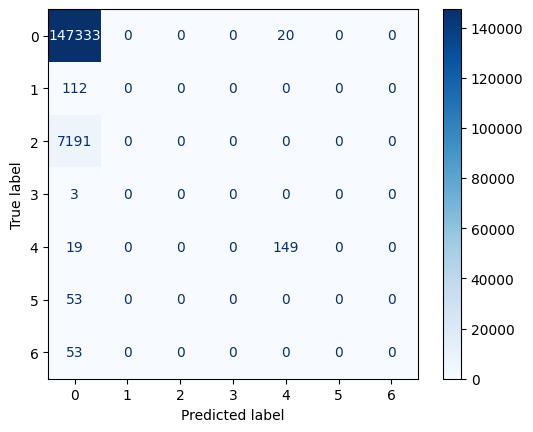

In [23]:
# Predict on the test set
# 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(server_model.predict(x_test), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(NUMOFCLASSES))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(NUMOFCLASSES)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Client 0: [2449, 0, 21073, 3, 0, 0, 130]
Client 1: [49808, 101, 0, 3, 0, 14, 0]
Client 2: [475, 3, 20785, 2, 133, 0, 145]
Client 3: [29, 78, 72, 3, 30, 277, 0]
Client 4: [0, 88, 0, 0, 101, 0, 0]
Client 5: [93861, 0, 0, 0, 0, 0, 2]
Client 6: [93966, 107, 31, 2, 127, 0, 0]
Client 7: [23030, 90, 2747, 0, 0, 3, 0]
Client 8: [94011, 0, 654, 3, 0, 0, 0]
Client 9: [479, 113, 278, 0, 7, 36, 0]
Shape of a single data point: (9,)
client 1/10 fitting
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.2153 - loss: 7.4699 - val_accuracy: 0.6011 - val_loss: 6.4291
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4560 - loss: 6.4379 - val_accuracy: 0.6339 - val_loss: 6.2685
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7011 - loss: 5.8653 - val_accuracy: 0.6230 - val_loss: 6.0546
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7517 - loss: 5.5008 - val_accuracy: 0.6230 - val_loss: 5.8153
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy:

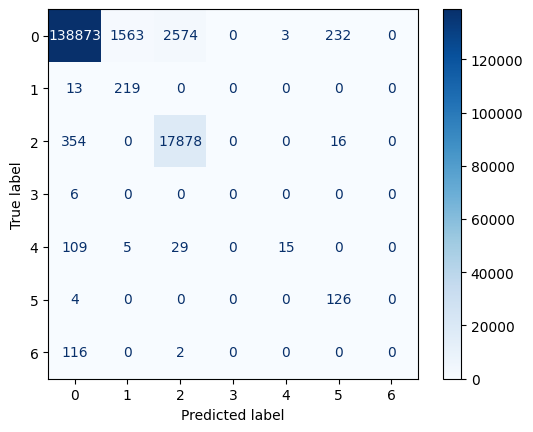

In [32]:
# Global configuration
from tensorflow.keras.optimizers import Adam, SGD

# Global configuration
NUMOFCLIENTS = 10  # number of clients (particles)
EPOCHS = 30  # number of total iterations
CLIENT_EPOCHS = 5  # number of each client's iterations
BATCH_SIZE = 256 # Size of batches to train on
ACC = 0.3
LOCAL_ACC = 0.7
GLOBAL_ACC = 1.4
DROP_RATE = 0
SELECT_CLIENTS = 1
# Model configuration
LOSS = 'sparse_categorical_crossentropy'
NUMOFCLASSES = 7
lr = 0.00002
# lr = 0.001
OPTIMIZER = Adam(learning_rate=lr)
# OPTIMIZER = SGD(learning_rate=lr, momentum=0.9, nesterov=False)

# Function to write results to CSV
def write_csv(algorithm_name, list):
    file_name = '{name}_10Clients_{drop}%_output_LR_{lr}_CLI_{cli}_CLI_EPOCHS_{cli_epoch}_TOTAL_EPOCHS_{epochs}_BATCH_{batch}.csv'
    file_name = file_name.format(drop=DROP_RATE, name=algorithm_name, lr=lr, cli=NUMOFCLIENTS, cli_epoch=CLIENT_EPOCHS, epochs=EPOCHS, batch=BATCH_SIZE)
    f = open(file_name, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)

    for l in list:
        wr.writerow(l)
    f.close()

def init_model(train_data_shape):
    model = CustomModel(loss=LOSS, optimizer=OPTIMIZER,num_classes=NUMOFCLASSES)
    init_model = model.fl_paper_model(train_shape=train_data_shape)

    return init_model

def client_data_config(non_iid_data, non_iid_labels, num_clients):
    client_data = []
    for i in range(num_clients):
        x_data, y_data = non_iid_data[i], non_iid_labels[i]
        client_data.append((x_data, y_data))

    return client_data


def fedAVG(server_weight):
    avg_weight = [np.zeros_like(w) for w in server_weight[0]]  # Initialize with the same structure as the first set of weights

    for client_weights in server_weight:
        for i, w in enumerate(client_weights):
            avg_weight[i] += w

    avg_weight = [w / len(server_weight) for w in avg_weight]  # Compute the average

    return avg_weight

def client_update(index, client, now_epoch, avg_weight):
    print("client {}/{} fitting".format(index + 1, int(NUMOFCLIENTS * SELECT_CLIENTS)))

    optimizer = tf.keras.optimizers.Adam()
    client.compile(optimizer=optimizer, loss=LOSS, metrics=['accuracy'])
    if now_epoch != 0:
        client.set_weights(avg_weight)

    client.fit(client_data[i][0], client_data[i][1],
        epochs=CLIENT_EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_split=0.2,
    )

    return client

if __name__ == "__main__":

    x_train = non_iid_data
    y_train = non_iid_labels
    x_test = non_iid_data_test
    y_test = non_iid_labels_test


    for i in range(NUMOFCLIENTS):
        lst = [0 for _ in range(NUMOFCLASSES)]
        for j in range(len(non_iid_labels[i])):
            value = non_iid_labels[i][j]
            lst[value] += 1
        print(f"Client {i}: {lst}")


    train_data_shape = (x_train[0].shape[1],)
    print("Shape of a single data point:", train_data_shape)
    client_data = client_data_config(x_train, y_train, NUMOFCLIENTS)
    server_model = init_model(train_data_shape=train_data_shape)


    fl_model = []
    for i in range(NUMOFCLIENTS):  # Keys are now starting from 0
        optimizer = Adam(learning_rate=lr)
        fl_model.append(init_model(train_data_shape=train_data_shape,))

    avg_weight = [np.zeros_like(w) for w in server_model.get_weights()]

    server_evaluate_acc = []

    for epoch in range(EPOCHS):
        server_weight = []

        selected_num = int(max(NUMOFCLIENTS * SELECT_CLIENTS, 1))
        split_data_index = []
        while len(split_data_index) < selected_num:
            item = random.choice(range(len(fl_model)))
            if item not in split_data_index:
                split_data_index.append(item)
        split_data_index.sort()
        selected_model = [fl_model[k] for k in split_data_index]

        for index, client in enumerate(selected_model):
            recv_model = client_update(index, client, epoch, avg_weight)

            rand = random.randint(0, 99)
            drop_communication = range(DROP_RATE)
            if rand not in drop_communication:
                server_weight.append(copy.deepcopy(recv_model.get_weights()))

        avg_weight = fedAVG(server_weight)

        server_model.set_weights(avg_weight)
        print("server {}/{} evaluate".format(epoch + 1, EPOCHS))
        server_evaluate_acc.append(server_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1))

    write_csv("FedAvg_Dritchlit_CICIDS", server_evaluate_acc)


# Predict on the test set
# 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(server_model.predict(x_test), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(NUMOFCLASSES))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(NUMOFCLASSES)])
disp.plot(cmap=plt.cm.Blues)
plt.show()

'''Confusion Matrix FedAvg_Dritchlit_CICIDS:
[[138873   1563   2574      0      3    232      0]
 [    13    219      0      0      0      0      0]
 [   354      0  17878      0      0     16      0]
 [     6      0      0      0      0      0      0]
 [   109      5     29      0     15      0      0]
 [     4      0      0      0      0    126      0]
 [   116      0      2      0      0      0      0]]'''

FedAvg DataFrame Head:
   2.5627217292785645  1.992210491152946e-05
0            2.448094               0.011635
1            2.462854               0.052485
2            2.345102               0.069289
3            2.228951               0.070953
4            1.997405               0.108197

FedPSO DataFrame Head:
   0.3920768201351166  0.9751372337341309
0            0.095506            0.983913
1            0.431928            0.923668
2            0.655777            0.923668
3            0.756608            0.923668
4            0.830589            0.923668

FedAvg IID DataFrame Head:
   0.05002670735120773  0.9870363473892212
0             0.064207            0.984571
1             0.109238            0.975046
2             0.069672            0.979858
3             0.044388            0.983941
4             0.038480            0.985790


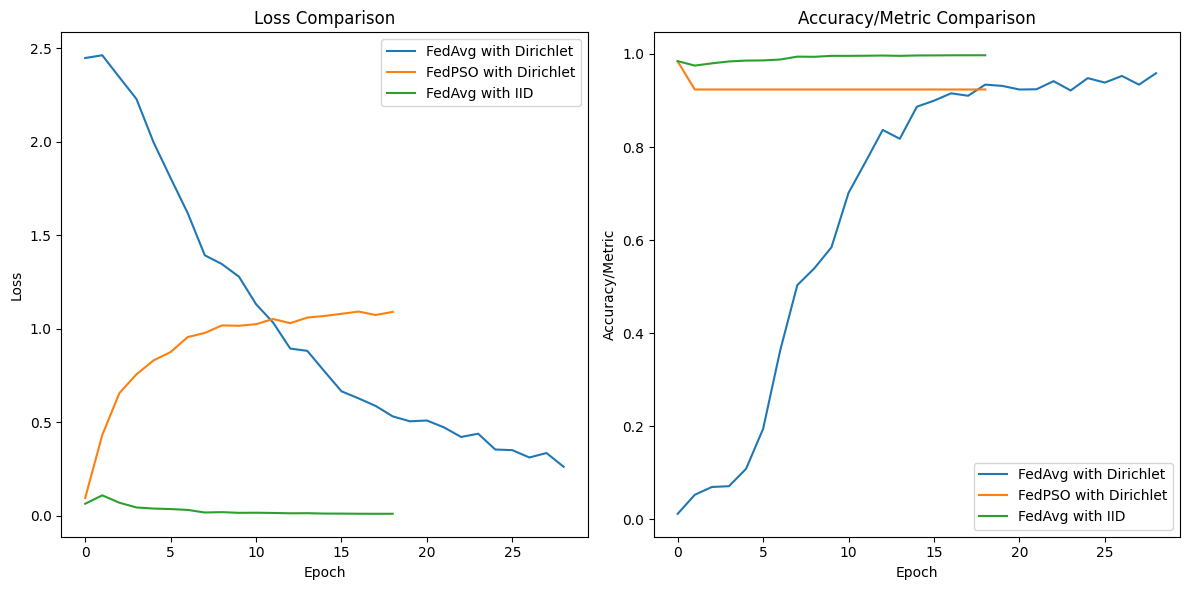

T-statistic for Loss between FedAvg Dirichlet and FedPSO Dirichlet: 0.759488932593116
P-value for Loss between FedAvg Dirichlet and FedPSO Dirichlet: 0.4514348826495529
There is no significant difference between the two models' losses.
T-statistic for Accuracy/Metric between FedAvg Dirichlet and FedPSO Dirichlet: -3.20503792822766
P-value for Accuracy/Metric between FedAvg Dirichlet and FedPSO Dirichlet: 0.002455787208820299
There is a significant difference between the two models' accuracies/metrics.
T-statistic for Loss between FedAvg IID and FedAvg Dirichlet: -6.097672476518859
P-value for Loss between FedAvg IID and FedAvg Dirichlet: 2.0666946190989956e-07
There is a significant difference between FedAvg IID and FedAvg Dirichlet losses.
T-statistic for Accuracy/Metric between FedAvg IID and FedAvg Dirichlet: 4.025318927125769
P-value for Accuracy/Metric between FedAvg IID and FedAvg Dirichlet: 0.00021050380961980394
There is a significant difference between FedAvg IID and FedAvg Di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the CSV files
fedavg_df = pd.read_csv('FedAvg_noniid_Dritchlit_FedAvg_20Clients_0%_output_LR_2e-05_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_30_BATCH_256.csv')
fedpso_df = pd.read_csv('FedPSO_Dritchlit_FedPso_10Clients_0%_output_LR_0.0001_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_20_BATCH_256.csv')
fedavg_iid_df = pd.read_csv('FedAvg_iid_FedAvg_10Clients_0%_output_LR_1e-05_CLI_10_CLI_EPOCHS_5_TOTAL_EPOCHS_20_BATCH_256.csv')

# Display the first few rows to verify structure
print("FedAvg DataFrame Head:")
print(fedavg_df.head())

print("\nFedPSO DataFrame Head:")
print(fedpso_df.head())

print("\nFedAvg IID DataFrame Head:")
print(fedavg_iid_df.head())

# Assuming the CSVs are loaded correctly, extract loss and accuracy/metric by column index
fedavg_loss = fedavg_df.iloc[:, 0]  # First column
fedavg_accuracy = fedavg_df.iloc[:, 1]  # Second column

fedpso_loss = fedpso_df.iloc[:, 0]  # First column
fedpso_accuracy = fedpso_df.iloc[:, 1]  # Second column

fedavg_iid_loss = fedavg_iid_df.iloc[:, 0]  # First column
fedavg_iid_accuracy = fedavg_iid_df.iloc[:, 1]  # Second column

# Plotting Loss Comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fedavg_loss, label='FedAvg with Dirichlet')
plt.plot(fedpso_loss, label='FedPSO with Dirichlet')
plt.plot(fedavg_iid_loss, label='FedAvg with IID')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy/Metric Comparison
plt.subplot(1, 2, 2)
plt.plot(fedavg_accuracy, label='FedAvg with Dirichlet')
plt.plot(fedpso_accuracy, label='FedPSO with Dirichlet')
plt.plot(fedavg_iid_accuracy, label='FedAvg with IID')
plt.title('Accuracy/Metric Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Metric')
plt.legend()

plt.tight_layout()
plt.show()

# Statistical Comparison of Final Losses
t_stat_loss, p_val_loss = ttest_ind(fedavg_loss, fedpso_loss)

print(f"T-statistic for Loss between FedAvg Dirichlet and FedPSO Dirichlet: {t_stat_loss}")
print(f"P-value for Loss between FedAvg Dirichlet and FedPSO Dirichlet: {p_val_loss}")

if p_val_loss < 0.05:
    print("There is a significant difference between the two models' losses.")
else:
    print("There is no significant difference between the two models' losses.")

# Statistical Comparison of Final Accuracies/Metrics
t_stat_acc, p_val_acc = ttest_ind(fedavg_accuracy, fedpso_accuracy)

print(f"T-statistic for Accuracy/Metric between FedAvg Dirichlet and FedPSO Dirichlet: {t_stat_acc}")
print(f"P-value for Accuracy/Metric between FedAvg Dirichlet and FedPSO Dirichlet: {p_val_acc}")

if p_val_acc < 0.05:
    print("There is a significant difference between the two models' accuracies/metrics.")
else:
    print("There is no significant difference between the two models' accuracies/metrics.")

# Statistical Comparison of FedAvg IID vs FedAvg Dirichlet
t_stat_iid_vs_dirichlet_loss, p_val_iid_vs_dirichlet_loss = ttest_ind(fedavg_iid_loss, fedavg_loss)

print(f"T-statistic for Loss between FedAvg IID and FedAvg Dirichlet: {t_stat_iid_vs_dirichlet_loss}")
print(f"P-value for Loss between FedAvg IID and FedAvg Dirichlet: {p_val_iid_vs_dirichlet_loss}")

if p_val_iid_vs_dirichlet_loss < 0.05:
    print("There is a significant difference between FedAvg IID and FedAvg Dirichlet losses.")
else:
    print("There is no significant difference between FedAvg IID and FedAvg Dirichlet losses.")

t_stat_iid_vs_dirichlet_acc, p_val_iid_vs_dirichlet_acc = ttest_ind(fedavg_iid_accuracy, fedavg_accuracy)

print(f"T-statistic for Accuracy/Metric between FedAvg IID and FedAvg Dirichlet: {t_stat_iid_vs_dirichlet_acc}")
print(f"P-value for Accuracy/Metric between FedAvg IID and FedAvg Dirichlet: {p_val_iid_vs_dirichlet_acc}")

if p_val_iid_vs_dirichlet_acc < 0.05:
    print("There is a significant difference between FedAvg IID and FedAvg Dirichlet accuracies/metrics.")
else:
    print("There is no significant difference between FedAvg IID and FedAvg Dirichlet accuracies/metrics.")
